In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta # 6개월 전 날짜 구하기

from wordcloud import WordCloud, STOPWORDS

In [13]:
volvo = pd.read_csv("volvo_newsscraping.csv")
volvo.head(3)

,뉴스구분,날짜,제목,요약,본문
0,By Press information,4/20/2023,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,Robust earnings and continued demand in Europe...,"In Q1, 2023, Volvo CE has secured good profita..."
1,By Press information,3/23/2023,KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLV...,Volvo Construction Equipment (Volvo CE) has an...,"Kamel, who has held the position of acting Hea..."
2,By Press information,3/15/2023,VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLE...,Volvo Construction Equipment (Volvo CE) showca...,Volvo CE presented an immersive platform of st...


In [24]:
current = datetime.datetime.now().date()
print(current)

2023-05-21


In [23]:
six_month_ago = current + relativedelta(months = -6)
print(six_month_ago)

2022-11-21


In [25]:
volvo['날짜'] = pd.to_datetime(volvo['날짜'])
volvo.head(3)

,뉴스구분,날짜,제목,요약,본문
0,By Press information,2023-04-20,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...,Robust earnings and continued demand in Europe...,"In Q1, 2023, Volvo CE has secured good profita..."
1,By Press information,2023-03-23,KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLV...,Volvo Construction Equipment (Volvo CE) has an...,"Kamel, who has held the position of acting Hea..."
2,By Press information,2023-03-15,VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLE...,Volvo Construction Equipment (Volvo CE) showca...,Volvo CE presented an immersive platform of st...


In [28]:
six_month_volvo = volvo[(volvo['날짜']>'2022-11-21') & (volvo['날짜']<='2023-05-21')]
six_month_volvo.tail()

,뉴스구분,날짜,제목,요약,본문
17,By Press information,2023-01-23,VOLVO CONSTRUCTION EQUIPMENT LEADS INDUSTRY CH...,As part of its ambition towards industry trans...,The Arvika factory in Sweden specializes in th...
18,By Press information,2023-01-18,VOLVO CE TO SHOWCASE SOLUTIONS FOR A CHANGING ...,Attendees will have the opportunity to test dr...,Volvo Construction Equipment (Volvo CE) is bui...
19,By Press information,2023-01-18,VOLVO CE INTRODUCES FIRST ELECTRIC MACHINE FOR...,Volvo Construction Equipment (Volvo CE) is unv...,The DD25 Electric will be unveiled at CONEXPO ...
20,By Press information,2023-01-11,VOLVO CE INTRODUCES COLLISION MITIGATION SYSTE...,"Delivering on its vision for zero accidents, V...",The first system of its kind from any original...
21,By Press information,2022-11-24,VOLVO CE PARTNERS ON SWEDEN'S LARGEST FOSSIL F...,"More than 2,000 tons of CO2 will be saved in a...",Volvo Construction Equipment (Volvo CE) is wor...


In [29]:
volvo_texts = volvo['본문'].values.tolist()
print(volvo_texts)

['In Q1, 2023, Volvo CE has secured good profitability and a boost to its operating margin with continued demand in large infrastructure and construction projects – particularly in North America and Europe – while increasing its own investments into the biggest technological shift in the industry’s history. \r\n\r\nCompared to the same period last year, Volvo CE is reporting a strong boost in sales of 17% in Europe and 37% in North America. This is more than compensating for a dip in sales in Asia and South America where investment levels have slowed down. With the exception of China, activity in the construction industry has continued to be good across most markets, driven primarily by ongoing infrastructure investments and by the mining industry, which benefits from continued good commodity prices.\r\n\r\nMelker Jernberg, President of Volvo CE, says: “Strong profitability and robust sales like the kind we see this quarter is of course important to us and is a testament to the great p

In [41]:
volvo_title = volvo["제목"].values.tolist()
volvo_title

['STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQUIPMENT',
 'KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLVO CONSTRUCTION EQUIPMENT',
 'VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLETE SOLUTIONS FOR A CHANGING INDUSTRY WITH IMMERSIVE EXPERIENCE AT CONEXPO-CON/AGG',
 'VOLVO CONSTRUCTION EQUIPMENT HELPS CUSTOMERS SEE BIGGER PICTURE WITH CONNECTED MAP IN NORTH AMERICA',
 'VOLVO CE DELIVERS NORTH AMERICA’S FIRST MACHINE MADE USING FOSSIL-FREE STEEL',
 'VOLVO CONSTRUCTION EQUIPMENT OPENS PRE-ORDER TOOL IN NORTH AMERICA FOR NEW DD25 ELECTRIC ASPHALT COMPACTOR',
 'VOLVO CE LAUNCHES THREE COMPACT ASSIST PACKAGES FOR VOLVO SOIL COMPACTORS',
 'VOLVO REMOTE CONTROL EXCAVATORS PUT SAFETY AND VERSATILITY IN YOUR HANDS',
 'VOLVO CONSTRUCTION EQUIPMENT INTRODUCES CONNECTED LOAD OUT TO IMPROVE JOBSITE EFFICIENCY',
 'VOLVO CONSTRUCTION EQUIPMENT LAUNCHES TASK MANAGER IN NORTH AMERICA TO HELP KEEP PROJECTS ON TRACK',
 'VOLVO CONSTRUCTION EQUIPMENT UNVEILS A NEW PORTFOLIO OF VOLVO SERVICE CONTRACTS',
 'EC

In [47]:
column_name = ['volvo_title_wc']
df = pd.DataFrame(columns=column_name)
df['volvo_title_wc'] = volvo_title
df.to_csv('volvo_title.csv', index=False)
display(df)

,volvo_title_wc
0,STRONG START TO 2023 FOR VOLVO CONSTRUCTION EQ...
1,KAMEL SID APPOINTED HEAD OF OPERATIONS AT VOLV...
2,VOLVO CONSTRUCTION EQUIPMENT HIGHLIGHTS COMPLE...
3,VOLVO CONSTRUCTION EQUIPMENT HELPS CUSTOMERS S...
4,VOLVO CE DELIVERS NORTH AMERICA’S FIRST MACHIN...
5,VOLVO CONSTRUCTION EQUIPMENT OPENS PRE-ORDER T...
6,VOLVO CE LAUNCHES THREE COMPACT ASSIST PACKAGE...
7,VOLVO REMOTE CONTROL EXCAVATORS PUT SAFETY AND...
8,VOLVO CONSTRUCTION EQUIPMENT INTRODUCES CONNEC...
9,VOLVO CONSTRUCTION EQUIPMENT LAUNCHES TASK MAN...


In [48]:
volvo_title_df = open("volvo_title.csv", encoding="UTF-8").read()

In [49]:
stopwords = set(STOPWORDS)

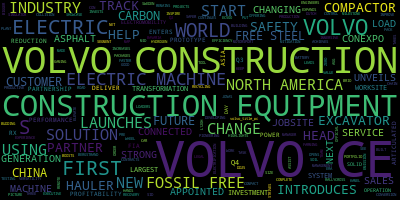

In [53]:
wc = WordCloud()
wc.generate_from_text(volvo_title_df)
wc.to_image()

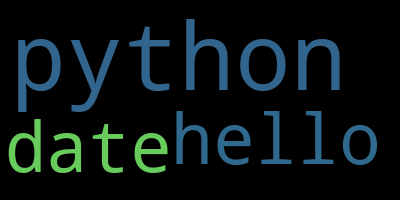

In [34]:
# text = 'python python hello date'
# wc = WordCloud()
# wc.generate_from_text(text)
# wc.to_image()